[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/Pesquisa-Operacional-III-A/blob/main/13_Filas.ipynb)

## **Pesquisa Operacional III-A**

**Professor:**
- Diogo Ferreira de Lima Silva (TEP-UFF)


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercício

Suponha que temos uma fila onde os **tempos entre chegadas de clientes** seguem uma distribuição exponencial com média de 5 minutos. Simule a chegada de 20 clientes.

In [68]:
np.random.seed(42)
n_clientes = 20
tempos_entre_chegadas = np.random.exponential(scale=5.0, size=n_clientes)
instantes_de_chegada = np.cumsum(tempos_entre_chegadas)

In [69]:
tempos_entre_chegadas

array([ 2.34634045, 15.05060715,  6.58372847,  4.56471277,  0.84812435,
        0.84798146,  0.29919384, 10.05615432,  4.59541077,  6.15625031,
        0.10399654, 17.51778738,  8.93214772,  1.19343813,  1.00339494,
        1.01305711,  1.81376865,  3.71963915,  2.82768533,  1.72111496])

In [70]:
instantes_de_chegada

array([ 2.34634045, 17.3969476 , 23.98067607, 28.54538884, 29.39351319,
       30.24149465, 30.5406885 , 40.59684282, 45.19225359, 51.3485039 ,
       51.45250044, 68.97028781, 77.90243553, 79.09587365, 80.0992686 ,
       81.11232571, 82.92609436, 86.64573351, 89.47341885, 91.19453381])

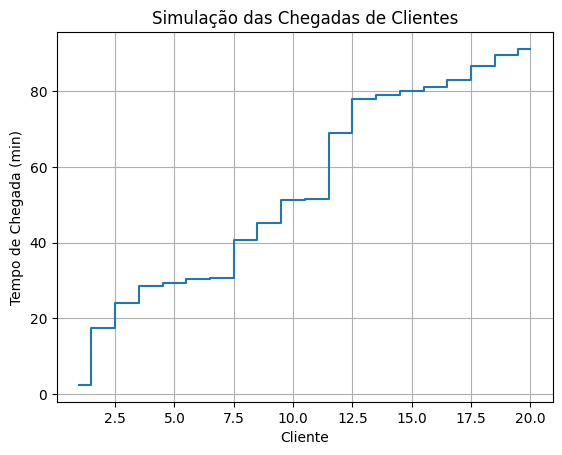

In [71]:
plt.step(range(1, n_clientes + 1), instantes_de_chegada, where='mid')
plt.xlabel("Cliente")
plt.ylabel("Tempo de Chegada (min)")
plt.title("Simulação das Chegadas de Clientes")
plt.grid(True)
plt.show()

### Exercício 2 

Você é responsável por simular uma fila de atendimento.

**Parâmetros:**
- Os tempos entre chegadas seguem uma distribuição exponencial com média 3 minutos;
- Os tempos de atendimento seguem uma distribuição uniforme entre 2 e 6 minutos.

**Tarefa:**
1. Simule a chegada de 30 clientes;
2. Calcule os tempos de início e término do atendimento de cada cliente (considere um único atendente);
3. Plote os gráficos:
    - Tempo de espera de cada cliente;
    - Tempo de sistema (espera + atendimento);

In [72]:
np.random.seed(42)

In [73]:
# Parâmetros
n_clientes = 30
media_chegada = 3.0
tempo_min_atendimento = 2.0
tempo_max_atendimento = 6.0

In [74]:
# Geração dos dados
tempos_entre_chegadas = np.random.exponential(scale= media_chegada, size=n_clientes)
instantes_chegada = np.cumsum(tempos_entre_chegadas)
tempos_atendimento = np.random.uniform(low=tempo_min_atendimento, high=tempo_max_atendimento, size=n_clientes)

In [75]:
print (tempos_entre_chegadas[:10])

print (instantes_chegada[:10])

print(tempos_atendimento[:10])

[1.40780427 9.03036429 3.95023708 2.73882766 0.50887461 0.50878888
 0.17951631 6.03369259 2.75724646 3.69375019]
[ 1.40780427 10.43816856 14.38840564 17.1272333  17.63610792 18.14489679
 18.3244131  24.35810569 27.11535215 30.80910234]
[4.43017941 2.68209649 2.26020637 5.79554215 5.86252813 5.23358939
 3.21845508 2.39068846 4.73693211 3.76060997]


In [76]:
# Análise da fila com um único atendente

inicio_atendimento = np.zeros(n_clientes)
fim_atendimento = np.zeros(n_clientes)
tempo_espera = np.zeros(n_clientes)
tempo_sistema = np.zeros(n_clientes)

for i in range(n_clientes):
    if i == 0:
        inicio_atendimento[i] = instantes_chegada[i]
    else:
        inicio_atendimento[i] = max(instantes_chegada[i], fim_atendimento[i - 1])
    fim_atendimento[i] = inicio_atendimento[i] + tempos_atendimento[i]
    tempo_espera[i] = inicio_atendimento[i] - instantes_chegada[i]
    tempo_sistema[i] = fim_atendimento[i] - instantes_chegada[i]

In [77]:
# Criar a tabela com pandas
tabela = pd.DataFrame({
    "Cliente": np.arange(1, n_clientes + 1),
    "Chegada (min)": instantes_chegada,
    "Início Atendimento (min)": inicio_atendimento,
    "Fim Atendimento (min)": fim_atendimento,
    "Tempo de Espera (min)": tempo_espera,
    "Tempo de Atendimento (min)": tempos_atendimento,
    "Tempo no Sistema (min)": tempo_sistema
})

# Exibir as primeiras linhas da tabela
tabela

,Cliente,Chegada (min),Início Atendimento (min),Fim Atendimento (min),Tempo de Espera (min),Tempo de Atendimento (min),Tempo no Sistema (min)
0,1,1.407804,1.407804,5.837984,0.000000,4.430179,4.430179
1,2,10.438169,10.438169,13.120265,0.000000,2.682096,2.682096
2,3,14.388406,14.388406,16.648612,0.000000,2.260206,2.260206
3,4,17.127233,17.127233,22.922775,0.000000,5.795542,5.795542
4,5,17.636108,22.922775,28.785304,5.286668,5.862528,11.149196
5,6,18.144897,28.785304,34.018893,10.640407,5.233589,15.873996
6,7,18.324413,34.018893,37.237348,15.694480,3.218455,18.912935
7,8,24.358106,37.237348,39.628037,12.879242,2.390688,15.269931
8,9,27.115352,39.628037,44.364969,12.512684,4.736932,17.249616
9,10,30.809102,44.364969,48.125579,13.555866,3.760610,17.316476


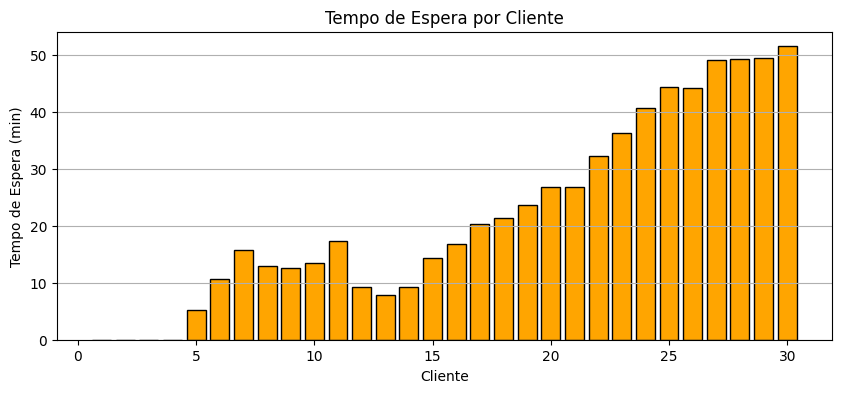

In [78]:
# Tempo de Espera por cliente

plt.figure(figsize=(10, 4))
plt.bar(range(1, n_clientes + 1), tempo_espera, color='orange', edgecolor='black')
plt.title("Tempo de Espera por Cliente")
plt.xlabel("Cliente")
plt.ylabel("Tempo de Espera (min)")
plt.grid(True, axis='y')
plt.show()

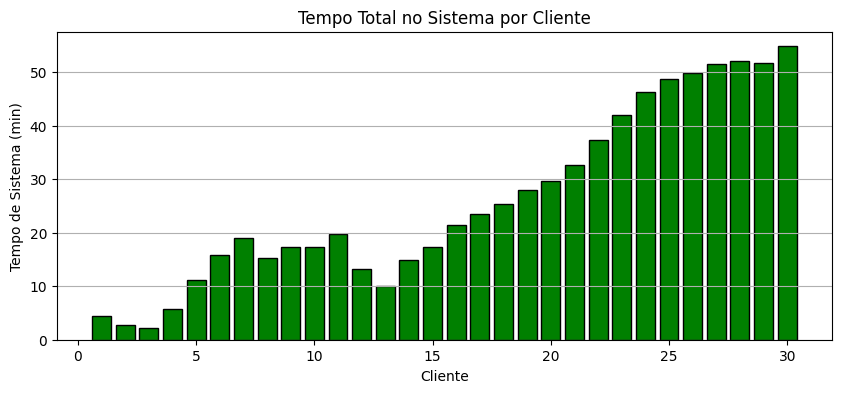

In [79]:
# Tempo Total no Sistema por Cliente

plt.figure(figsize=(10, 4))
plt.bar(range(1, n_clientes + 1), tempo_sistema, color='green', edgecolor='black')
plt.title("Tempo Total no Sistema por Cliente")
plt.xlabel("Cliente")
plt.ylabel("Tempo de Sistema (min)")
plt.grid(True, axis='y')
plt.show()

# Usando a biblioteca simpy

Para sistemas e experimentos mais complexos, será necessário utilizar uma biblioteca focada em Simulação. 

Vejamos o uso da biblioteca simpy para análise de alguns sistemas de filas.

In [81]:
!pip install simpy

In [82]:
import simpy # usado para a modelagem

In [83]:
np.random.seed(2)

### Exemplo de processo que não alcança estado estável

Exemplo de processo M/M/2, com $\lambda = 1$ cliente/minuto e $\mu = 0,2$ clientes/minuto.

Como $\rho = \frac{\lambda}{s\times \mu} = \frac{1}{0,4} >1$, é esperado que o processo não estabilize.

A fila explodirá. 

Altere o código e calcule o tempo médio de espera dos clientes que finalizaram o serviço.

In [84]:
def estabelecimento (environment, nome_cliente, servidor):
    #imprima na tela o tempo de chegada.
    print (f"{nome_cliente} chega ao estabelecimento em {environment.now}") 
    
    #guarde a informação na variável tempo_chegada.
    tempo_chegada = environment.now 
    
    # A atividade requer um servidor. Usamos o with para demonstrar isso. 
    with servidor.request() as req:
        # Espere até o servidor estar disponível e guarde o tempo.
        yield req 
        
        # Escreva na tela o tempo de início do serviço
        print (f"{nome_cliente} inicia o serviço em {environment.now}") 
        # guarde o tempo de início em uma variável chamada tempo_inicio
        tempo_inicio = environment.now

        # tempo de espera será o tempo_inicio - tempo_chegada 
        tempo_em_fila.append(tempo_inicio - tempo_chegada)

        # O tempo estimado segue uma exponencial trabalha com Mu=0,2
        yield environment.timeout(np.random.exponential(scale = 1/0.2))  
        
        #Imprima na tela o tempo de saída do sistema
        print (f"{nome_cliente} finaliza o serviço e sai do estabelecimento em {environment.now}")
        tempo_saida = environment.now
        
        # O tempo no sistema será tempo_saida - tempo_chegada
        tempo_no_sistema.append(tempo_saida - tempo_chegada) 

def chegadas (environment):
    id = 1 #guarda o id do cliente 
    
    # Enquanto houver simulação:
    while True:
        # Passa um tempo até a próxima chegada, seguindo exponencial com média (1/lambda)
        yield environment.timeout(np.random.exponential(1))
        
        # Um cliente chega no processo
        environment.process(estabelecimento (environment, 'Cliente %d' % id, servidor))
        
        # O próximo cliente terá id = id + 1
        id += 1



In [85]:
tempo_em_fila = [] # uma lista vazia que receberá os tempos em fila
tempo_no_sistema = [] # uma lista vazia que receberá os tempos no sistema de filas

ambiente = simpy.Environment()
servidor = simpy.Resource(ambiente, capacity=2)
ambiente.process(chegadas(ambiente))
ambiente.run(until = 480)

Cliente 1 chega ao estabelecimento em 0.572691988769615
Cliente 1 inicia o serviço em 0.572691988769615
Cliente 2 chega ao estabelecimento em 0.5989602296341173
Cliente 2 inicia o serviço em 0.5989602296341173
Cliente 3 chega ao estabelecimento em 1.1704605467316322
Cliente 4 chega ao estabelecimento em 1.5714379710784327
Cliente 5 chega ao estabelecimento em 1.8004092632823856
Cliente 6 chega ao estabelecimento em 2.7660766179296994
Cliente 7 chega ao estabelecimento em 3.1222583601902674
Cliente 2 finaliza o serviço e sai do estabelecimento em 3.325767820257166
Cliente 3 inicia o serviço em 3.325767820257166
Cliente 8 chega ao estabelecimento em 3.4326323239845378
Cliente 9 chega ao estabelecimento em 4.185831240829883
Cliente 10 chega ao estabelecimento em 4.3303715184336475
Cliente 1 finaliza o serviço e sai do estabelecimento em 4.561481629797835
Cliente 4 inicia o serviço em 4.561481629797835
Cliente 11 chega ao estabelecimento em 5.051050486825083
Cliente 4 finaliza o serviço e 

In [86]:
print (f"Número de clientes que iniciaram o atendimento : {len(tempo_em_fila)}")
print (f"O tempo de espera médio: {np.mean(tempo_em_fila).round(2)} minutos")
print (f"O tempo médio no sistema: {np.mean(tempo_no_sistema).round(2)} minutos")

Número de clientes que iniciaram o atendimento : 211
O tempo de espera médio: 145.16 minutos
O tempo médio no sistema: 148.42 minutos


Veja que o tempo de espera médio foi de mais de 2 horas.

Na verdade, só contabilizamos tempos de espera que conseguiram iniciar o atendimento.

Perceba que chegaram mais de 400 clientes e menos da metade deles foram atendidos.

Seria interessante termos uma forma de guardar a utilização dos recursos e o número de clientes em fila!

# Analisando Recursos

A análise de recursos não é tão simples quanto guardar os tempos dos eventos. Para realizar uma análise efetiva, precisamos acessar os recursos após cada mudança no sistema.

A boa notícia é que já há uma função pronta disponibilizada na documentação do SimPy, copiada na célula abaixo.

Nesse código, usaremos decoradores de função (wrappers) para modificar recursos do SimPy, de modo que armazenaremos algumas características  antes e após alguma no mesmo.

O código abaixo é semelhante ao disponível na documentação. Algumas modificações foram realizadas em termos usados e nos comentários.

- https://simpy.readthedocs.io/en/latest/topical_guides/monitoring.html

In [87]:
from functools import partial, wraps

def modifica_recurso (recurso, pre=None, post=None):
    '''
    Modificaremos o recurso para que este chame o *pre* antes de cada operação 
    e o *post* após cada operação.
    *pre* e *post* fazem parte do wraps, que chamamos do pacote functools.
    Operações típicas de recursos do SimPy são: put, get, request e release.
    '''

    def get_decorador(func):
        
        # Cria um decorador para as funções internas dos recursos: put/get/request/release
        @wraps(func)
        def decorador(*args, **kwargs):
            # Chame o "pre" antes de aplicar a função
            if pre:
                pre(recurso)

            # aplique a função
            ret = func(*args, **kwargs)
            
            # Chame o "post" após aplicar a função
            if post:
                post(recurso)
            
            return ret #retorna o que a função retornaria
        return decorador # retorna a função modificada pelo decorador

    # Modifique a operação original pela modificada com o wrapper
    for nome in ['put', 'get', 'request', 'release']:
        
        # Se acontecer uma operação do tipo nome no recurso em questão, mude os atributos
        if hasattr(recurso, nome):
            setattr(recurso, nome, get_decorador(getattr(recurso, nome)))


# Armazenaremos o que queremos do recurso em questão em uma lista chamada dados
def monitoramento(dados_controle, recurso):
    item = (
            recurso._env.now,  # O tempo de simulação na ocorrência de uma operação
            recurso.count,  # Número de recursos do tipo em questão sendo utilizados
            len(recurso.queue),  # Número de trabalhos em fila para o recurso
    )   
    dados_controle.append(item)

In [88]:
tempo_em_fila = [] # uma lista vazia que receberá os tempos em fila
tempo_no_sistema = [] # uma lista vazia que receberá os tempos no sistema de filas

ambiente2 = simpy.Environment()
servidor = simpy.Resource(ambiente2, capacity=2)

dados_controle=[]
monitoramento = partial(monitoramento, dados_controle)
modifica_recurso (servidor, post = monitoramento)


ambiente2.process(chegadas(ambiente2))
ambiente2.run(until = 480)

Cliente 1 chega ao estabelecimento em 1.0057745514978653
Cliente 1 inicia o serviço em 1.0057745514978653
Cliente 2 chega ao estabelecimento em 2.780517926275744
Cliente 2 inicia o serviço em 2.780517926275744
Cliente 3 chega ao estabelecimento em 3.027373914356762
Cliente 4 chega ao estabelecimento em 3.329853504307073
Cliente 5 chega ao estabelecimento em 6.117450714314247
Cliente 6 chega ao estabelecimento em 9.267489162075108
Cliente 7 chega ao estabelecimento em 9.442095436341779
Cliente 2 finaliza o serviço e sai do estabelecimento em 9.506944651326478
Cliente 3 inicia o serviço em 9.506944651326478
Cliente 3 finaliza o serviço e sai do estabelecimento em 9.748326937476108
Cliente 4 inicia o serviço em 9.748326937476108
Cliente 8 chega ao estabelecimento em 11.114761172135692
Cliente 9 chega ao estabelecimento em 11.772403946543838
Cliente 10 chega ao estabelecimento em 12.687643260632994
Cliente 1 finaliza o serviço e sai do estabelecimento em 13.007286158626197
Cliente 5 inicia

## Vejamos os dados que conseguimos!

In [89]:
dados_controle

[(1.0057745514978653, 1, 0),
 (2.780517926275744, 2, 0),
 (3.027373914356762, 2, 1),
 (3.329853504307073, 2, 2),
 (6.117450714314247, 2, 3),
 (9.267489162075108, 2, 4),
 (9.442095436341779, 2, 5),
 (9.506944651326478, 1, 5),
 (9.748326937476108, 1, 4),
 (11.114761172135692, 2, 4),
 (11.772403946543838, 2, 5),
 (12.687643260632994, 2, 6),
 (13.007286158626197, 1, 6),
 (14.114420478988379, 2, 6),
 (14.322287188584255, 1, 6),
 (14.704862276161501, 1, 5),
 (14.813628813173086, 2, 5),
 (14.876336295424164, 2, 6),
 (16.458505776492423, 2, 7),
 (16.58774785987782, 2, 8),
 (18.91700470655516, 2, 9),
 (19.9233239442252, 2, 10),
 (20.29464120675054, 2, 11),
 (22.298192568447103, 2, 12),
 (22.49711993238155, 2, 13),
 (22.739915624640226, 2, 14),
 (23.134278861833486, 2, 15),
 (23.209381817670536, 1, 15),
 (23.66843290834262, 2, 15),
 (24.443181505378817, 1, 15),
 (26.190547933492233, 2, 15),
 (26.958199260566886, 1, 15),
 (27.345956150195228, 1, 14),
 (28.41832966223046, 1, 13),
 (29.223482677253

### Organizando os dados dataframe

In [90]:
servidor_dados = pd.DataFrame(dados_controle, columns = ["Tempo", "Servidores Trabalhando", "Lq"])
servidor_dados

,Tempo,Servidores Trabalhando,Lq
0,1.005775,1,0
1,2.780518,2,0
2,3.027374,2,1
3,3.329854,2,2
4,6.117451,2,3
...,...,...,...
640,478.336685,2,283
641,478.669512,2,284
642,478.736706,2,285
643,479.102486,2,286


### Podemos adicionar uma linha no topo para ser o estado inicial, quando nenhum cliente chegou:

In [91]:
servidor_dados.loc[-1] = [0.0, 0, 0]  # adding a row
servidor_dados.index = servidor_dados.index + 1  # shifting index
servidor_dados.sort_index(inplace=True) 
servidor_dados

,Tempo,Servidores Trabalhando,Lq
0,0.000000,0.0,0.0
1,1.005775,1.0,0.0
2,2.780518,2.0,0.0
3,3.027374,2.0,1.0
4,3.329854,2.0,2.0
...,...,...,...
641,478.336685,2.0,283.0
642,478.669512,2.0,284.0
643,478.736706,2.0,285.0
644,479.102486,2.0,286.0


### Agora adicionarems uma linha no fim com o estado do sistema no momento 480.

In [92]:
servidor_dados.loc[len(servidor_dados)] = [480, 2, 333]
servidor_dados

,Tempo,Servidores Trabalhando,Lq
0,0.000000,0.0,0.0
1,1.005775,1.0,0.0
2,2.780518,2.0,0.0
3,3.027374,2.0,1.0
4,3.329854,2.0,2.0
...,...,...,...
642,478.669512,2.0,284.0
643,478.736706,2.0,285.0
644,479.102486,2.0,286.0
645,479.966434,2.0,287.0


### Queremos o tempo em que observamos cada estado antes de um novo evento!

Podemos chegar a isso com "servidor_1.diff()" aplicado à coluna tempo

In [93]:
servidor_dados["Intervalo"] = servidor_dados["Tempo"].diff().shift(-1)
servidor_dados

,Tempo,Servidores Trabalhando,Lq,Intervalo
0,0.000000,0.0,0.0,1.005775
1,1.005775,1.0,0.0,1.774743
2,2.780518,2.0,0.0,0.246856
3,3.027374,2.0,1.0,0.302480
4,3.329854,2.0,2.0,2.787597
...,...,...,...,...
642,478.669512,2.0,284.0,0.067194
643,478.736706,2.0,285.0,0.365780
644,479.102486,2.0,286.0,0.863948
645,479.966434,2.0,287.0,0.033566


A última linha ficou com um NaN. Vamos excluí-la:


In [94]:
servidor_dados = servidor_dados.dropna(axis = 0)
servidor_dados

,Tempo,Servidores Trabalhando,Lq,Intervalo
0,0.000000,0.0,0.0,1.005775
1,1.005775,1.0,0.0,1.774743
2,2.780518,2.0,0.0,0.246856
3,3.027374,2.0,1.0,0.302480
4,3.329854,2.0,2.0,2.787597
...,...,...,...,...
641,478.336685,2.0,283.0,0.332827
642,478.669512,2.0,284.0,0.067194
643,478.736706,2.0,285.0,0.365780
644,479.102486,2.0,286.0,0.863948


## Calculando métricas interessantes

### Número médio de clientes em fila


Sabemos que a fila está explodindo. Vejamos a média de clientes em fila nesses 480 min simulados


In [95]:
servidor_dados["Intervalo"] @ servidor_dados["Lq"] / servidor_dados["Intervalo"].sum()

np.float64(139.1911293893894)

### Uso dos servidores, lembrando que em nosso exemplo $s=2$

In [96]:
servidor_dados["Intervalo"] @ servidor_dados["Servidores Trabalhando"] / servidor_dados["Intervalo"].sum()

np.float64(1.7017802580889592)

### Porcentagem do tempo que não temos ninguem no sistema

In [97]:
servidor_ocioso = servidor_dados[servidor_dados["Servidores Trabalhando"] == 0]
servidor_ocioso

,Tempo,Servidores Trabalhando,Lq,Intervalo
0,0.0,0.0,0.0,1.005775


In [98]:
servidor_ocioso["Intervalo"].sum() / servidor_dados["Intervalo"].sum()

np.float64(0.002095363648953886)